In [146]:
### Other Usecases that can be created from this data
#Price Prediction
# CLuster of top products,sellers,customer etc
#Segmenting of sellers.
#Product Recommendation
# Predicting delivery date and  time of products
# Timeseries for forecasting sales
#Timeseries for forecasting delivery
# Market Basket Analysis
# RFM analysis
# Customer churn
#Life time value customerprediction

In [147]:
#USecase: Given a review of a product in Portuguese,   to classify if it is  a positive or negative review 
#(a review is considered positive if it has a score of 4 or 5, anytihng below four is considered a negative review)

# As the language is in Portugese, i did not clean the text or remove stopwords.
#I tried using transalation package to translate the text to English first to clean the text 
#but the lib was unable to convert from Protuges. Hence left the text as it is 
### Next few cells I was just going through the data

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split,GridSearchCV
from scipy.sparse import hstack
from sklearn.metrics import f1_score,accuracy_score,roc_auc_score,precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
import seaborn as sns
import itertools
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

In [149]:
df_order_payments =  pd.read_csv("...\olist_order_payments_dataset.csv")
df_order_data =  pd.read_csv("...\olist_orders_dataset.csv')
df_customer_data = pd.read_csv("...\olist_customers_dataset.csv')
df_geo_data =  pd.read_csv("...\olist_geolocation_dataset.csv')
df_order_items =  pd.read_csv("...\olist_order_items_dataset.csv')
df_products_data = pd.read_csv"...\olist_products_dataset.csv')
df_sellers_data = pd.read_csv("...\olist_sellers_dataset.csv')
df_product_category = pd.read_csv("...\product_category_name_translation.csv')
df_order_reviews =  pd.read_csv("...\olist_order_reviews_dataset.csv')

In [150]:
print(df_order_payments.shape)
print(df_order_reviews.shape)
print(df_order_data.shape)
print(df_customer_data.shape)
print(df_geo_data.shape)
print(df_order_items.shape)
print(df_products_data.shape)
print(df_sellers_data.shape)
print(df_product_category.shape)

(103886, 5)
(100000, 7)
(99441, 8)
(99441, 5)
(1000163, 5)
(112650, 7)
(32951, 9)
(3095, 4)
(71, 2)


In [151]:
df_customer_data.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


In [152]:
df_customer_data.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [153]:
#Top 10 cities with their value counts
df_customer_data.customer_city.value_counts().sort_values(ascending=False)[:10]

sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: customer_city, dtype: int64

In [154]:
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [155]:
df_order_items.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [156]:
print('No. of sellers :',df_order_items.seller_id.unique().shape[0])
print('No. of  products that are unique are : ',df_order_items.product_id.unique().shape[0])

No. of sellers : 3095
No. of  products that are unique are :  32951


In [157]:
df_order_items.shape

(112650, 7)

In [158]:
df_order_items.price.describe()

count    112650.000000
mean        120.653739
std         183.633928
min           0.850000
25%          39.900000
50%          74.990000
75%         134.900000
max        6735.000000
Name: price, dtype: float64

In [159]:
df_order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [160]:
df_order_payments.shape

(103886, 5)

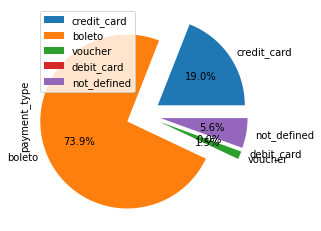

In [161]:
explode = [0.2]*5
df_order_payments['payment_type'].groupby(df_order_payments['payment_type']).count().plot(kind='pie',radius=1,labels= df_order_payments.payment_type.unique(),autopct='%.1f%%',explode=explode)
plt.legend()
plt.show()

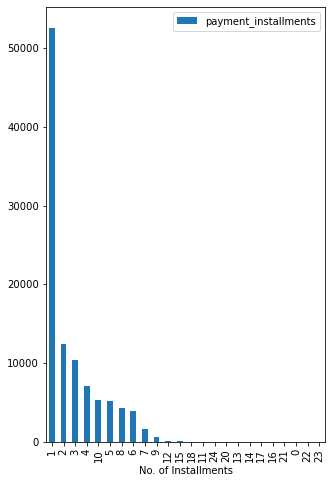

In [162]:
df_order_payments.payment_installments.value_counts().plot(kind = 'bar',figsize=(5,8))
plt.legend()
plt.xlabel('No. of Installments')
plt.show()

In [163]:
#checking if any null/NA present in any entry
df_order_payments.isnull().any().any()

False

In [164]:
#Observation
###Most customers made payment via boleto
###Next by credit card
###Number of installments majority of the time is 1

In [165]:
df_order_data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


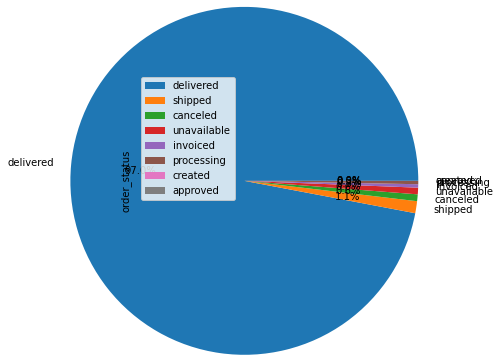

In [166]:
#order_status
df_order_data.order_status.value_counts().plot(kind='pie',radius=2,autopct='%.1f%%')
plt.legend()
plt.show()

In [167]:
df_order_data.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [168]:
df_products_data.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


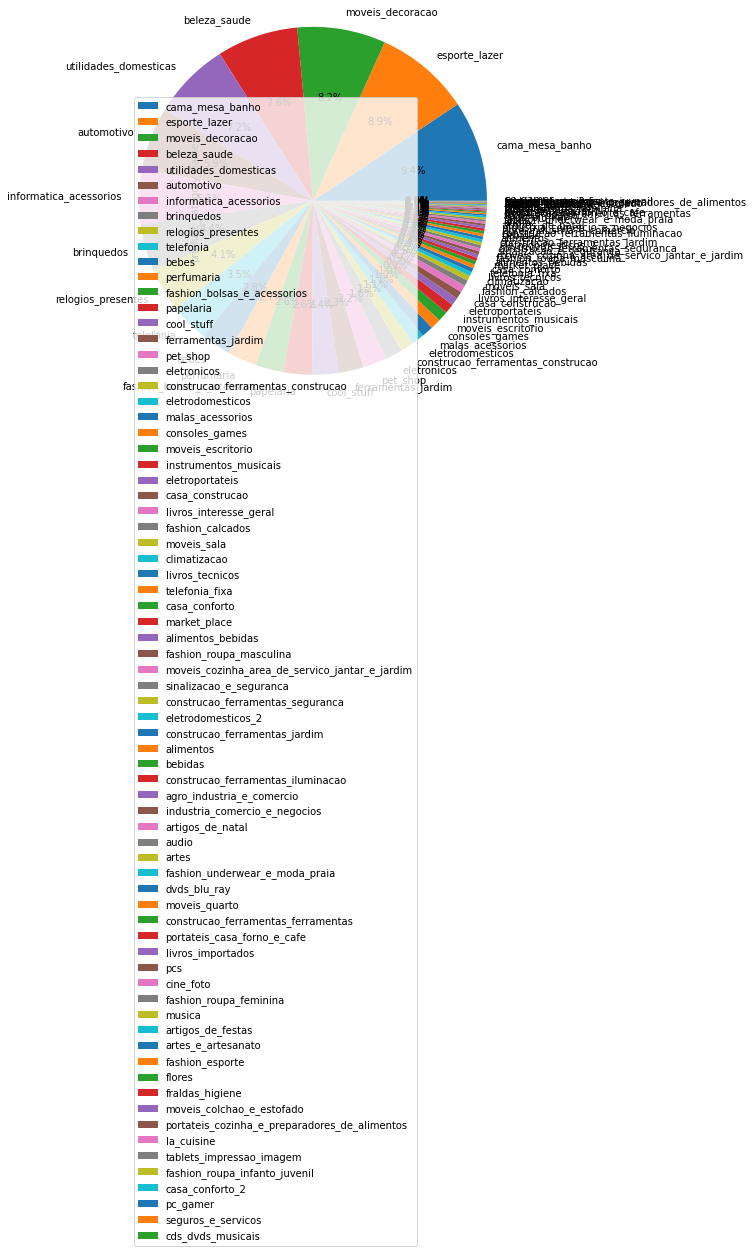

In [169]:
df_products_data.product_category_name.value_counts().plot(kind='pie',radius=2,autopct='%.1f%%')
plt.legend()
plt.show()

In [170]:
df_products_data.product_category_name.unique().size

74

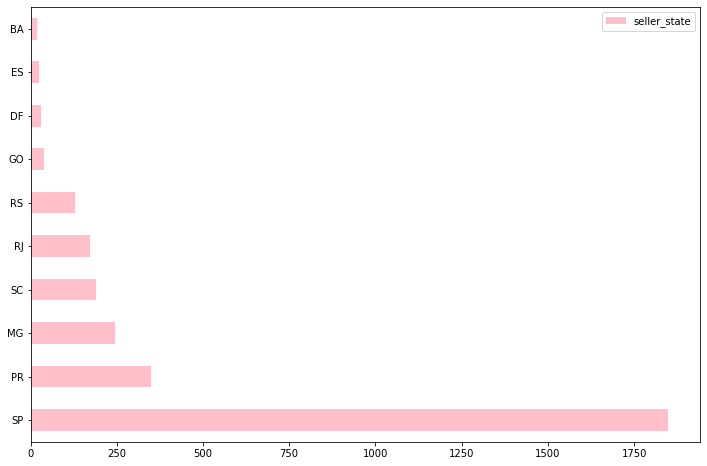

In [171]:
#top 10  seller state
df_sellers_data.seller_state.value_counts().sort_values(ascending=False)[:10].plot(kind='barh',color='pink',figsize=(12,8))
plt.legend()
plt.show()

In [172]:
### STARTING THE USECASE

In [173]:

df_order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [174]:
df_order_reviews = df_order_reviews[['review_score','review_comment_message']]
df_order_reviews.columns = ['score', 'comment']
df_order_reviews.head()

,score,comment
0,4,NaN
1,5,NaN
2,5,NaN
3,5,Recebi bem antes do prazo estipulado.
4,5,Parabéns lojas lannister adorei comprar pela I...


In [175]:
df_order_reviews.shape

(100000, 2)

In [176]:
from sklearn.metrics import confusion_matrix, classification_report

this_labels = ['Negative','Positive']

def output_report(y_rea, y_preds, name="", labels=this_labels):
    if(name != ''):
        print(name,"\n")
    print(confusion_matrix(y_rea, y_preds), '\n')
    print(classification_report(y_rea, y_preds, target_names=labels))

In [177]:
def words_plot_dist(mydf, target_column, title='Word distribution', x_axis='Words in col'):
    
    len_name = target_column +'_len'
    print('lenght_name',len_name)
    print('target_col',target_column)
    mydf[len_name] = np.array(list(map(len, mydf[target_column])))
    val = mydf[len_name]
    median = val.median()
    mean   = val.mean()
    mode   = val.mode()[0]
    # figure
    fig, ax = plt.subplots()
    sns.distplot(mydf[len_name], bins=mydf[len_name].max(),
                hist_kws={"alpha": 0.9, "color": "blue"}, ax=ax,
                kde_kws={"color": "black", 'linewidth': 3})
    ax.set_xlim(left=0, right=np.percentile(mydf[len_name], 95)) 
    ax.set_xlabel(x_axis)
    ymax = 0.020
    plt.ylim(0, ymax)
    # plot vertical lines for statistics
    ax.plot([mode, mode], [0, ymax], '--', label=f'mode = {mode:.2f}', linewidth=4)
    ax.plot([mean, mean], [0, ymax], '--', label=f'mean = {mean:.2f}', linewidth=4)
    ax.plot([median, median], [0, ymax], '--', label=f'median = {median:.2f}', linewidth=4)
    ax.set_title(title, fontsize=20)
    plt.legend()
    plt.show()

In [178]:
def eda_plot(series_categorical, title = "", fix_labels=False, bar_format='{}'):
    series_name = series_categorical.name
    val_counts = series_categorical.value_counts()
    val_counts.name = 'quantity'
    val_percentage = series_categorical.value_counts(normalize=True)
    val_percentage.name = "percentage"
    val_concat = pd.concat([val_counts, val_percentage], axis = 1)
    val_concat.reset_index(level=0, inplace=True)
    val_concat = val_concat.rename( columns = {'index': series_name} )
    
    fig, ax = plt.subplots(figsize = (12,4), ncols=2, nrows=1) # figsize = (width, height)
    if(title != ""):
        fig.suptitle(title, fontsize=18)
        fig.subplots_adjust(top=0.8)

    s = sns.barplot(x=series_name, y='quantity', data=val_concat, ax=ax[0])
    if(fix_labels):
        val_concat = val_concat.sort_values(series_name).reset_index()
    
    for index, row in val_concat.iterrows():
        s.text(row.name, row['quantity'], bar_format.format(row['quantity']), color='black', ha="center")

    s2 = val_concat.plot.pie(y='percentage', autopct=lambda value: '{:.2f}%'.format(value),
                             labels=val_concat[series_name].tolist(), legend=None, ax=ax[1],
                             title="Percentage Plot")

    ax[1].set_ylabel('')
    ax[0].set_title('Quantity Plot')

    plt.show()

In [179]:
def ngrams_corpus_counter(corpus,ngram_range,n=None):
    
    vec = CountVectorizer(stop_words = 'english',ngram_range=ngram_range).fit(corpus)
    bow = vec.transform(corpus)
    sum_words = bow.sum(axis=0) 
    words_frequency = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_frequency =sorted(words_frequency, key = lambda x: x[1], reverse=True)
    tot_list=words_frequency[:n]
    df_final=pd.DataFrame(tot_list,columns=['text','count'])
    return df_final

def ngrams_words(series_words, title='Top ten words'):
    
    # Generate
    _1grams = ngrams_corpus_counter(series_words, (1,1), 10)
    _2grams = ngrams_corpus_counter(series_words, (2,2), 10)
    _3grams = ngrams_corpus_counter(series_words, (3,3), 10)

    fig, axes = plt.subplots(figsize = (18,4), ncols=3)
    fig.suptitle(title)

    sns.barplot(y=_1grams['text'], x=_1grams['count'],ax=axes[0])
    axes[0].set_title("one grams")

    sns.barplot(y=_2grams['text'], x=_2grams['count'],ax=axes[1])
    axes[1].set_title("two grams",)

    sns.barplot(y=_3grams['text'], x=_3grams['count'],ax=axes[2])
    axes[2].set_title("three grams")

    plt.show()
    

In [180]:
df_order_reviews.shape

(100000, 2)

In [181]:
df_order_reviews = df_order_reviews.dropna()
df_order_reviews = df_order_reviews.reset_index(drop=True)
print('df_order_reviews now' , df_order_reviews.shape)



df_order_reviews now (41753, 2)


In [182]:
df_order_reviews.shape

(41753, 2)

In [183]:
#from translate import Translator
#translator= Translator(from_lang="portugal",to_lang="english")
#translation = translator.translate("Recebi bem antes do prazo estipulado")
#print (translation)

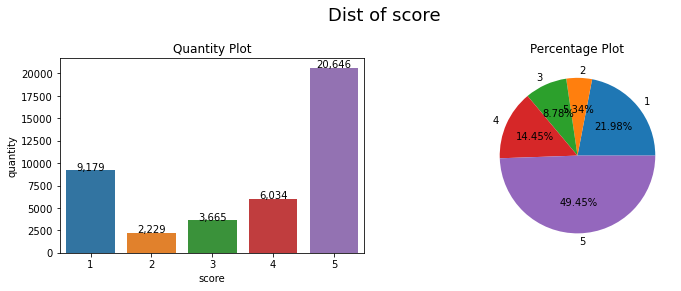

In [184]:
eda_plot(df['score'], fix_labels=True, bar_format='{:,.0f}', title='Dist of score')

lenght_name comment_len
target_col comment


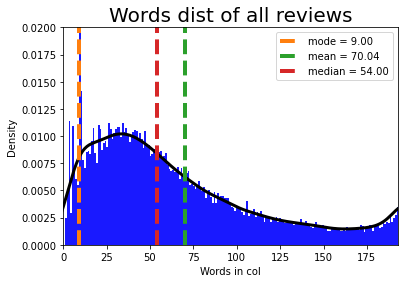

In [185]:
words_plot_dist(df_order_reviews, 'comment', 'Words dist of all reviews')

lenght_name comment_len
target_col comment


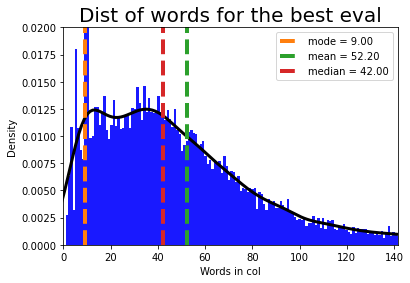

In [186]:
words_plot_dist(df_order_reviews.query('score == 5'), 'comment', 'Dist of words for the best eval')

lenght_name comment_len
target_col comment


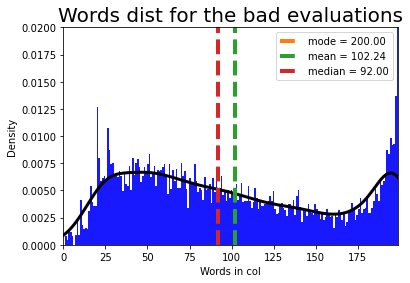

In [187]:
words_plot_dist(df_order_reviews.query('score == 1'), 'comment', 'Words dist for the bad evaluations')

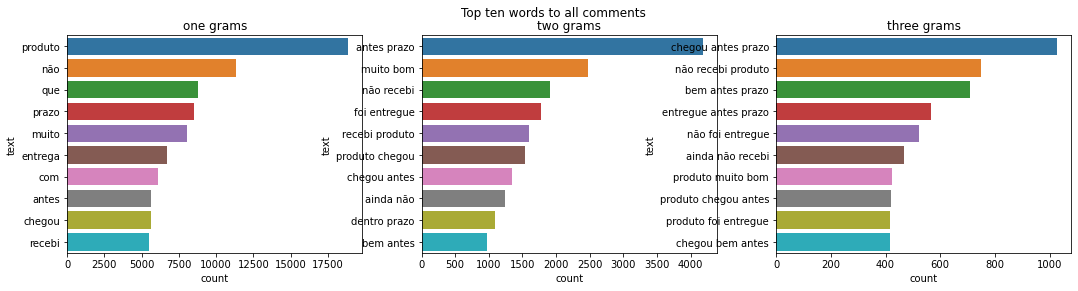

In [188]:
ngrams_words(df_order_reviews['comment'], 'Top ten words to all comments')

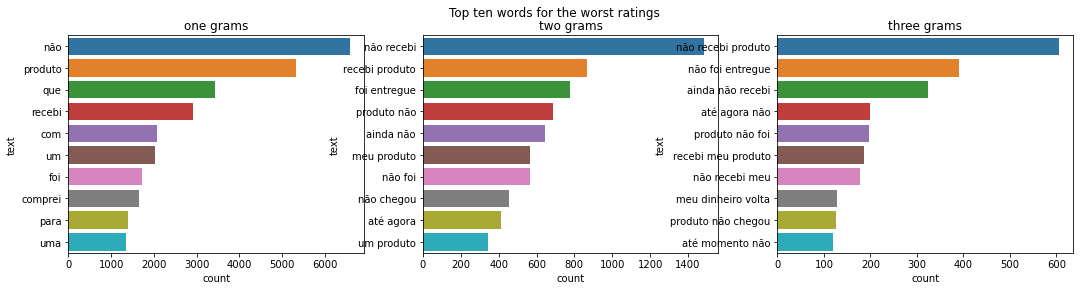

In [189]:
ngrams_words(df_order_reviews.query('score == 1')['comment'], 'Top ten words for the worst ratings')

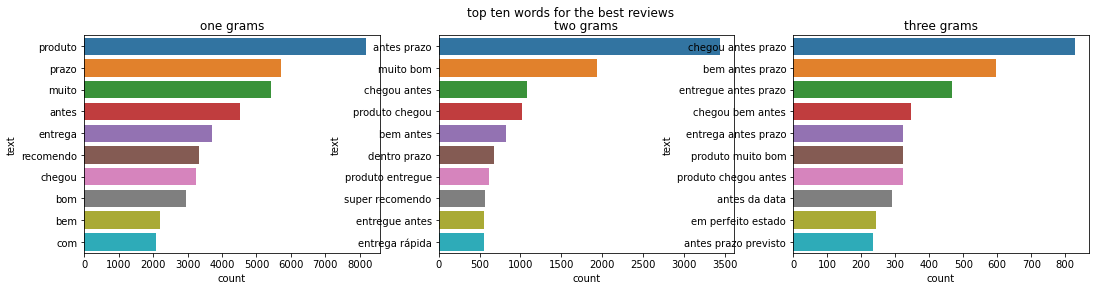

In [190]:
ngrams_words(df_order_reviews.query('score == 5')['comment'], 'top ten words for the best reviews')

In [191]:
from sklearn.model_selection import train_test_split

X = df_order_reviews['comment'].values

y = df_order_reviews['score'].replace({1: 0, 2: 0, 3: 0, 4: 1, 5: 1})

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)

In [192]:
print(x_train[0])
print(y_train[0])

Adoro o stark, sempre compro coisas mais em conta, e também caras como exemplo meu celular, e recebo tudo lindo e certinho.
1


In [193]:
from sklearn.feature_extraction.text import CountVectorizer

# instantiate the vectorizer
vec = CountVectorizer()
vec.fit(np.concatenate((x_train, x_test), axis=0))

X_train_dm = vec.transform(x_train)
X_test_dm = vec.transform(x_test)
x_full_dm = vec.transform( np.concatenate((x_train, x_test), axis=0) )

from sklearn.feature_extraction.text import TfidfTransformer

tfidf_trans = TfidfTransformer()
tfidf_trans.fit( x_full_dm )
X_train_dm_tfft = tfidf_trans.transform(X_train_dm)
X_test_dm_tfft  = tfidf_trans.transform(X_test_dm)

In [194]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression(solver='liblinear')
logr.fit(X_train_dm, y_train)
y_pred = logr.predict(X_test_dm)
output_report(y_test, y_pred, "Logistic Regression CountVect")

logr = LogisticRegression(solver='liblinear')
logr.fit(X_train_dm_tfft, y_train)
y_pred = logr.predict(X_test_dm_tfft)
output_report(y_test, y_pred, "Logistic Regression TD-IDF")

Logistic Regression CountVect 

[[2460  534]
 [ 377 4980]] 

              precision    recall  f1-score   support

    Negative       0.87      0.82      0.84      2994
    Positive       0.90      0.93      0.92      5357

    accuracy                           0.89      8351
   macro avg       0.89      0.88      0.88      8351
weighted avg       0.89      0.89      0.89      8351

Logistic Regression TD-IDF 

[[2542  452]
 [ 425 4932]] 

              precision    recall  f1-score   support

    Negative       0.86      0.85      0.85      2994
    Positive       0.92      0.92      0.92      5357

    accuracy                           0.89      8351
   macro avg       0.89      0.88      0.89      8351
weighted avg       0.89      0.89      0.89      8351



In [195]:
data_tuples = list(zip(y_test,y_pred_class))

df_final=pd.DataFrame(data_tuples, columns=['y_test','y_pred_class'])

In [196]:
df_final.tail(5)

,y_test,y_pred_class
8346,1,0
8347,0,1
8348,1,1
8349,1,0
8350,0,1


In [197]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier() 
forest = forest.fit(X_train_dm, y_train)
y_pred = forest.predict(X_test_dm)
output_report(y_test, y_pred, 'RandomForestClassifier VetCount:')


forest = RandomForestClassifier() 
forest.fit(X_train_dm_tfft, y_train)
y_pred_class = forest.predict(X_test_dm_tfft)
output_report(y_test, y_pred_class, "RandomForestClassifier TD-IDF")

RandomForestClassifier VetCount: 

[[2559  435]
 [ 529 4828]] 

              precision    recall  f1-score   support

    Negative       0.83      0.85      0.84      2994
    Positive       0.92      0.90      0.91      5357

    accuracy                           0.88      8351
   macro avg       0.87      0.88      0.88      8351
weighted avg       0.89      0.88      0.88      8351

RandomForestClassifier TD-IDF 

[[2575  419]
 [ 551 4806]] 

              precision    recall  f1-score   support

    Negative       0.82      0.86      0.84      2994
    Positive       0.92      0.90      0.91      5357

    accuracy                           0.88      8351
   macro avg       0.87      0.88      0.87      8351
weighted avg       0.89      0.88      0.88      8351



In [198]:
from sklearn.svm import LinearSVC

linear_svc = LinearSVC(C=0.5, random_state=42)
linear_svc.fit(X_train_dm, y_train)
y_pred_class = linear_svc.predict(X_test_dm)
output_report(y_test, y_pred_class, "Linear SVC  CountVectorizer") 

linear_svc = LinearSVC(C=0.5, random_state=42)
linear_svc.fit(X_train_dm_tfft, y_train)
y_pred_class = linear_svc.predict(X_test_dm_tfft)
output_report(y_test, y_pred_class, "Linear SVC  TD-IDF") 

Linear SVC  CountVectorizer 

[[2432  562]
 [ 382 4975]] 

              precision    recall  f1-score   support

    Negative       0.86      0.81      0.84      2994
    Positive       0.90      0.93      0.91      5357

    accuracy                           0.89      8351
   macro avg       0.88      0.87      0.88      8351
weighted avg       0.89      0.89      0.89      8351

Linear SVC  TD-IDF 

[[2544  450]
 [ 417 4940]] 

              precision    recall  f1-score   support

    Negative       0.86      0.85      0.85      2994
    Positive       0.92      0.92      0.92      5357

    accuracy                           0.90      8351
   macro avg       0.89      0.89      0.89      8351
weighted avg       0.90      0.90      0.90      8351



In [199]:
from sklearn.tree import DecisionTreeClassifier


dt = DecisionTreeClassifier(class_weight='balanced',max_depth=20,min_samples_split=300)
dt.fit(X_train_dm, y_train)
y_pred_class = dt.predict(X_test_dm)
output_report(y_test, y_pred_class, "Decision Tree  CountVectorizer") 

linear_svc = LinearSVC(C=0.5, random_state=42)
linear_svc.fit(X_train_dm_tfft, y_train)
y_pred_class = linear_svc.predict(X_test_dm_tfft)
output_report(y_test, y_pred_class, "Decision Tree  TD-IDF") 



Decision Tree  CountVectorizer 

[[2364  630]
 [ 726 4631]] 

              precision    recall  f1-score   support

    Negative       0.77      0.79      0.78      2994
    Positive       0.88      0.86      0.87      5357

    accuracy                           0.84      8351
   macro avg       0.82      0.83      0.82      8351
weighted avg       0.84      0.84      0.84      8351

Decision Tree  TD-IDF 

[[2544  450]
 [ 417 4940]] 

              precision    recall  f1-score   support

    Negative       0.86      0.85      0.85      2994
    Positive       0.92      0.92      0.92      5357

    accuracy                           0.90      8351
   macro avg       0.89      0.89      0.89      8351
weighted avg       0.90      0.90      0.90      8351



In [200]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB(alpha=0.0001,class_prior=[0.5,0.5])
mnb.fit(X_train_dm, y_train)
y_pred_class = mnb.predict(X_test_dm)
output_report(y_test, y_pred_class, "MultinomialNB  CountVectorizer") 

linear_svc = LinearSVC(C=0.5, random_state=42)
linear_svc.fit(X_train_dm_tfft, y_train)
y_pred_class = linear_svc.predict(X_test_dm_tfft)
output_report(y_test, y_pred_class, "MultinomialNB  TD-IDF") 

MultinomialNB  CountVectorizer 

[[2567  427]
 [ 630 4727]] 

              precision    recall  f1-score   support

    Negative       0.80      0.86      0.83      2994
    Positive       0.92      0.88      0.90      5357

    accuracy                           0.87      8351
   macro avg       0.86      0.87      0.86      8351
weighted avg       0.88      0.87      0.87      8351

MultinomialNB  TD-IDF 

[[2544  450]
 [ 417 4940]] 

              precision    recall  f1-score   support

    Negative       0.86      0.85      0.85      2994
    Positive       0.92      0.92      0.92      5357

    accuracy                           0.90      8351
   macro avg       0.89      0.89      0.89      8351
weighted avg       0.90      0.90      0.90      8351

